In [ ]:
# This file explores any correlations between listing neighbourhood and price.
# Location is such an important factor in real estate, it seems that there would be a relationship between which neighbourhood a listing is located in and its price.
# Because there are hundreds of neighbourhoods in each city, we focused on the 5 neighbourhoods in each city with the most listings.
# Our findings are that each neighbourhood had a wide range of prices and quite a few outliers, there doesn't seem to be a strong relationship
# between the neighbourhood and the price.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt  
import scipy.stats as st 
import numpy as np 
import datetime as dt 
import seaborn as sns

In [2]:
# increase max number of columns and rows visible and read in master data file
pd.set_option('display.max_columns', 45)
pd.set_option('display.max_rows', 45)
price_df = pd.read_csv('../BM_files/all_listings_df')
price_df.head()

,id,last_scraped,description,neighborhood_overview,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,city
0,360,2023-09-24,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,666,2008-07-08,"Denver, CO",within an hour,100%,97%,t,3,4,t,t,Highland,39.766415,-105.002098,Entire guesthouse,Entire home/apt,3,NaN,1 bath,2.0,2.0,90.0,t,4,27,57,147,179,7,0,4.99,4.99,4.96,5.00,5.00,5.00,4.91,f,2,2.87,Denver
1,364,2023-09-24,"Modern 1,000 square foot loft in the heart of ...","Ten brewpubs within walking distance, two grea...",783,2008-07-11,"Denver, CO",NaN,NaN,NaN,f,1,1,t,t,Five Points,39.766720,-104.979060,Entire loft,Entire home/apt,3,NaN,1.5 baths,1.0,1.0,179.0,t,23,53,83,358,87,0,0,4.85,4.78,4.81,4.95,4.96,4.65,4.71,f,1,0.50,Denver
2,590,2023-09-24,"Large guest room in my home, where I also live...",I love the diversity of my neighborhood and it...,933,2008-07-21,"Denver, CO",within an hour,100%,95%,t,2,2,t,t,North Park Hill,39.755110,-104.911090,Private room in home,Private room,3,NaN,1 shared bath,NaN,1.0,64.0,t,5,27,53,233,712,43,2,4.85,4.78,4.58,4.93,4.95,4.76,4.85,f,2,4.04,Denver
3,592,2023-09-24,This room is in the basement. It does not hav...,NaN,933,2008-07-21,"Denver, CO",within an hour,100%,95%,t,2,2,t,t,North Park Hill,39.754810,-104.911060,Private room in home,Private room,2,NaN,1 shared bath,NaN,1.0,57.0,t,0,0,0,158,168,1,0,4.87,4.75,4.55,4.94,4.94,4.81,4.86,f,2,0.95,Denver
4,686,2023-09-24,Thanks for visiting my Queen Bed Room site for...,"I love my Uptown neighborhood, which is within...",990,2008-07-23,"Denver, CO",within a few hours,100%,100%,t,2,4,t,t,North Capitol Hill,39.746950,-104.978380,Private room in home,Private room,2,NaN,1 private bath,NaN,2.0,33.0,t,0,0,13,288,256,0,0,4.76,4.75,4.80,4.86,4.91,4.87,4.81,f,2,1.39,Denver


In [3]:
# row count
# price_df

In [4]:
# check for null values in 'price'
null_counts_price = price_df['price'].isna().sum()
print(null_counts_price)

0


In [5]:
# check for null values in 'neighbourhood_cleansed'
null_counts_neigh = price_df['neighbourhood_cleansed'].isna().sum()
print(null_counts_neigh)

0


In [6]:
# Create neighbourhood dataframe

neigh_df = pd.DataFrame(price_df[["id", "price", "neighbourhood_cleansed", "city"]])

neigh_df = neigh_df.set_index("id")
neigh_df

,price,neighbourhood_cleansed,city
id,,,
360,90.0,Highland,Denver
364,179.0,Five Points,Denver
590,64.0,North Park Hill,Denver
592,57.0,North Park Hill,Denver
686,33.0,North Capitol Hill,Denver
...,...,...,...
979474665987354279,258.0,Humboldt,Portland
980422903985425172,99.0,Pearl,Portland
980439098128842446,165.0,Humboldt,Portland


In [7]:
# Group by city and neighbourhood

neigh_grouped_df = neigh_df.groupby(['city', 'neighbourhood_cleansed']).value_counts()

neigh_grouped_df

city      neighbourhood_cleansed  price
Boston    Allston                 75.0     9
                                  999.0    7
                                  99.0     6
                                  65.0     5
                                  50.0     5
                                          ..
Portland  Woodstock               97.0     1
                                  100.0    1
                                  101.0    1
                                  108.0    1
                                  380.0    1
Name: count, Length: 14177, dtype: int64

In [8]:
#create a dataframe with just the city and neighbourhood columns, no price included
no_price_df = neigh_df[['city', 'neighbourhood_cleansed']]

#groupby city and neighbourhood. Use size() to get a count of listings in each neighbourhood
grouped_no_price = no_price_df.groupby(['city', 'neighbourhood_cleansed']).size()

#reset index in the grouped by series to convert to dataframe and name the values column 'count'
grouped_no_price = grouped_no_price.reset_index(name='count')

#sort values by city, then by count to see neighbourhoods with most listings in each city
sorted_grouped_no_price = grouped_no_price.sort_values(by=['city', 'count'], ascending=False)
sorted_grouped_no_price

,city,neighbourhood_cleansed,count
195,Portland,Northwest District,262
208,Portland,Richmond,261
151,Portland,Buckman,202
204,Portland,Portland Downtown,192
155,Portland,Concordia,164
...,...,...,...
2,Boston,Bay Village,58
11,Boston,Hyde Park,54
23,Boston,West End,43
13,Boston,Leather District,9


In [9]:
#Create new dataframe with just the top 5 neighbourhoods in each city in regards to numbers of listings

top_neigh = sorted_grouped_no_price.groupby('city').apply(lambda x: x.head(5)).reset_index(drop=True)
top_neigh

,city,neighbourhood_cleansed,count
0,Boston,Dorchester,493
1,Boston,Downtown,343
2,Boston,Back Bay,326
3,Boston,Roxbury,292
4,Boston,South End,286
5,Denver,Five Points,455
6,Denver,Highland,328
7,Denver,West Colfax,242
8,Denver,Union Station,199
9,Denver,Gateway - Green Valley Ranch,176


In [10]:
# merge the original neighbourhood dataframe with the top 5 neighbourhood data frame to bring in prices for each listing in the top 5 neighbourhoods.

merged_neigh = pd.merge(neigh_df, top_neigh, on=['city', 'neighbourhood_cleansed'])
merged_neigh.head(25)

,price,neighbourhood_cleansed,city,count
0,90.0,Highland,Denver,328
1,136.0,Highland,Denver,328
2,75.0,Highland,Denver,328
3,143.0,Highland,Denver,328
4,140.0,Highland,Denver,328
5,125.0,Highland,Denver,328
6,100.0,Highland,Denver,328
7,150.0,Highland,Denver,328
8,106.0,Highland,Denver,328
9,99.0,Highland,Denver,328


In [15]:
# Below box plot is used in the final presentation and can be seen on slide 4.

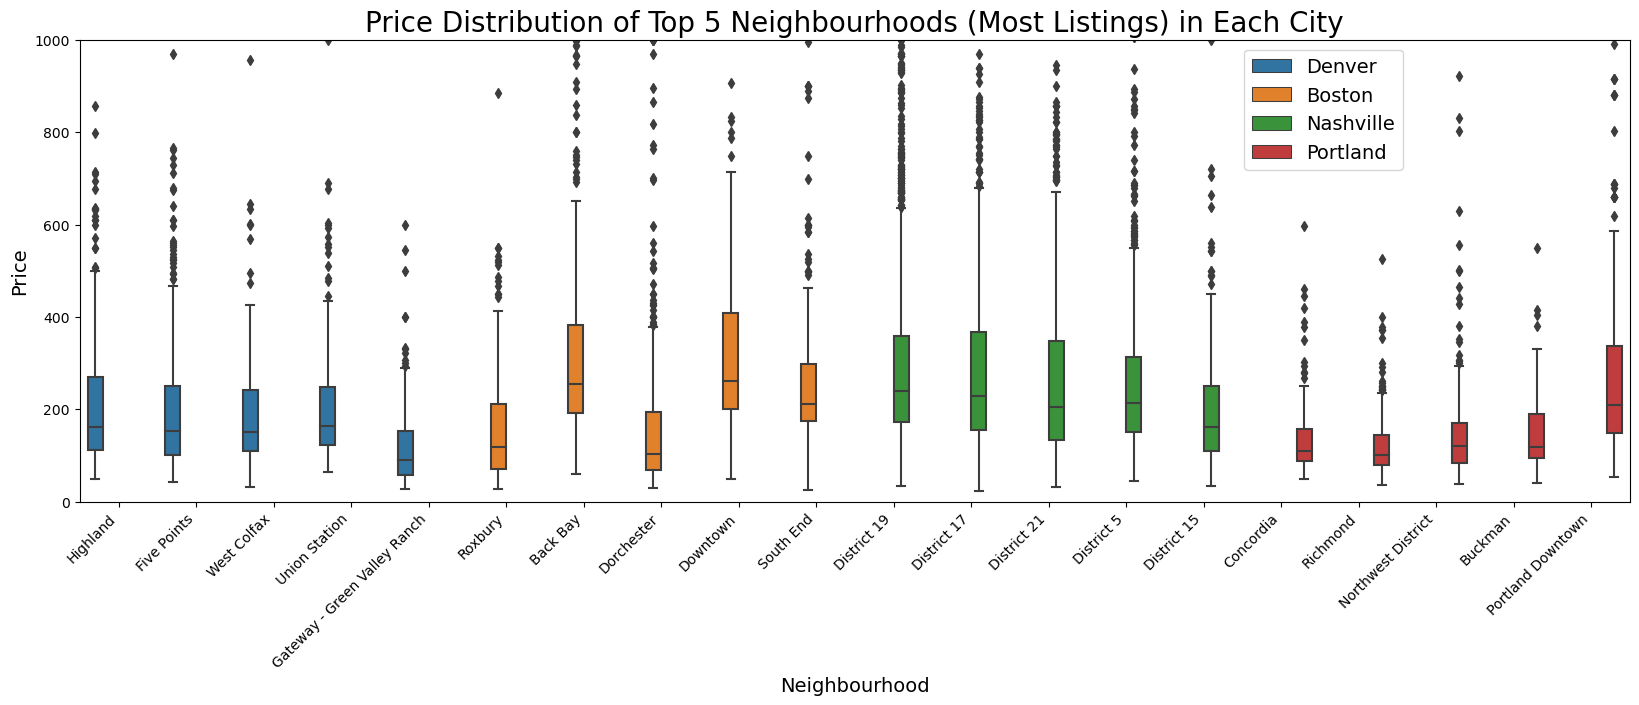

In [16]:
# created a box plot from the merged dataframe of the top 5 neighbourhood by city
# color the label by city

# fig, axs = plt.subplots(2, 2, figsize=(10, 10))
plt.figure(figsize=(20, 6))
sns.boxplot(x='neighbourhood_cleansed', y='price', hue='city', data=merged_neigh)

plt.title('Price Distribution of Top 5 Neighbourhoods (Most Listings) in Each City', fontsize=20)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(fontsize=10)
plt.ylim(0,1000)
plt.legend(loc='upper right', bbox_to_anchor=(.86, 1), fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.xlabel("Neighbourhood", fontsize=14)


plt.show()

In [ ]:
####### Following box plots were explored, but not used in the final presentation.

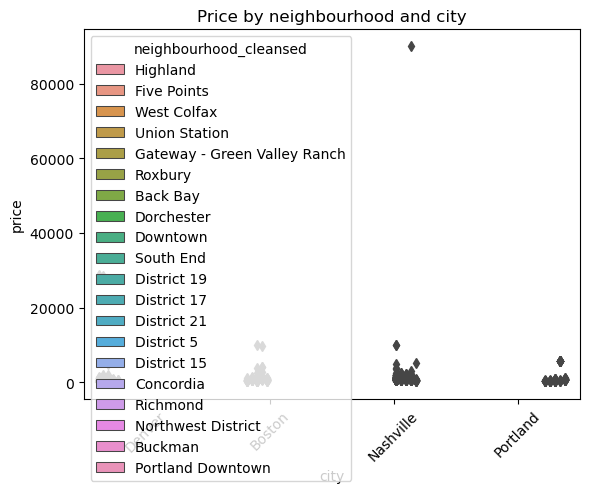

In [12]:
# created a box plot from the merged dataframe of the top 5 neighbourhood by city
# this has too many neighbourhoods to color the label by neighbourhood

sns.boxplot(x='city', y='price', hue='neighbourhood_cleansed', data=merged_neigh)
plt.title('Price by neighbourhood and city')
plt.xticks(rotation=45)
plt.show()

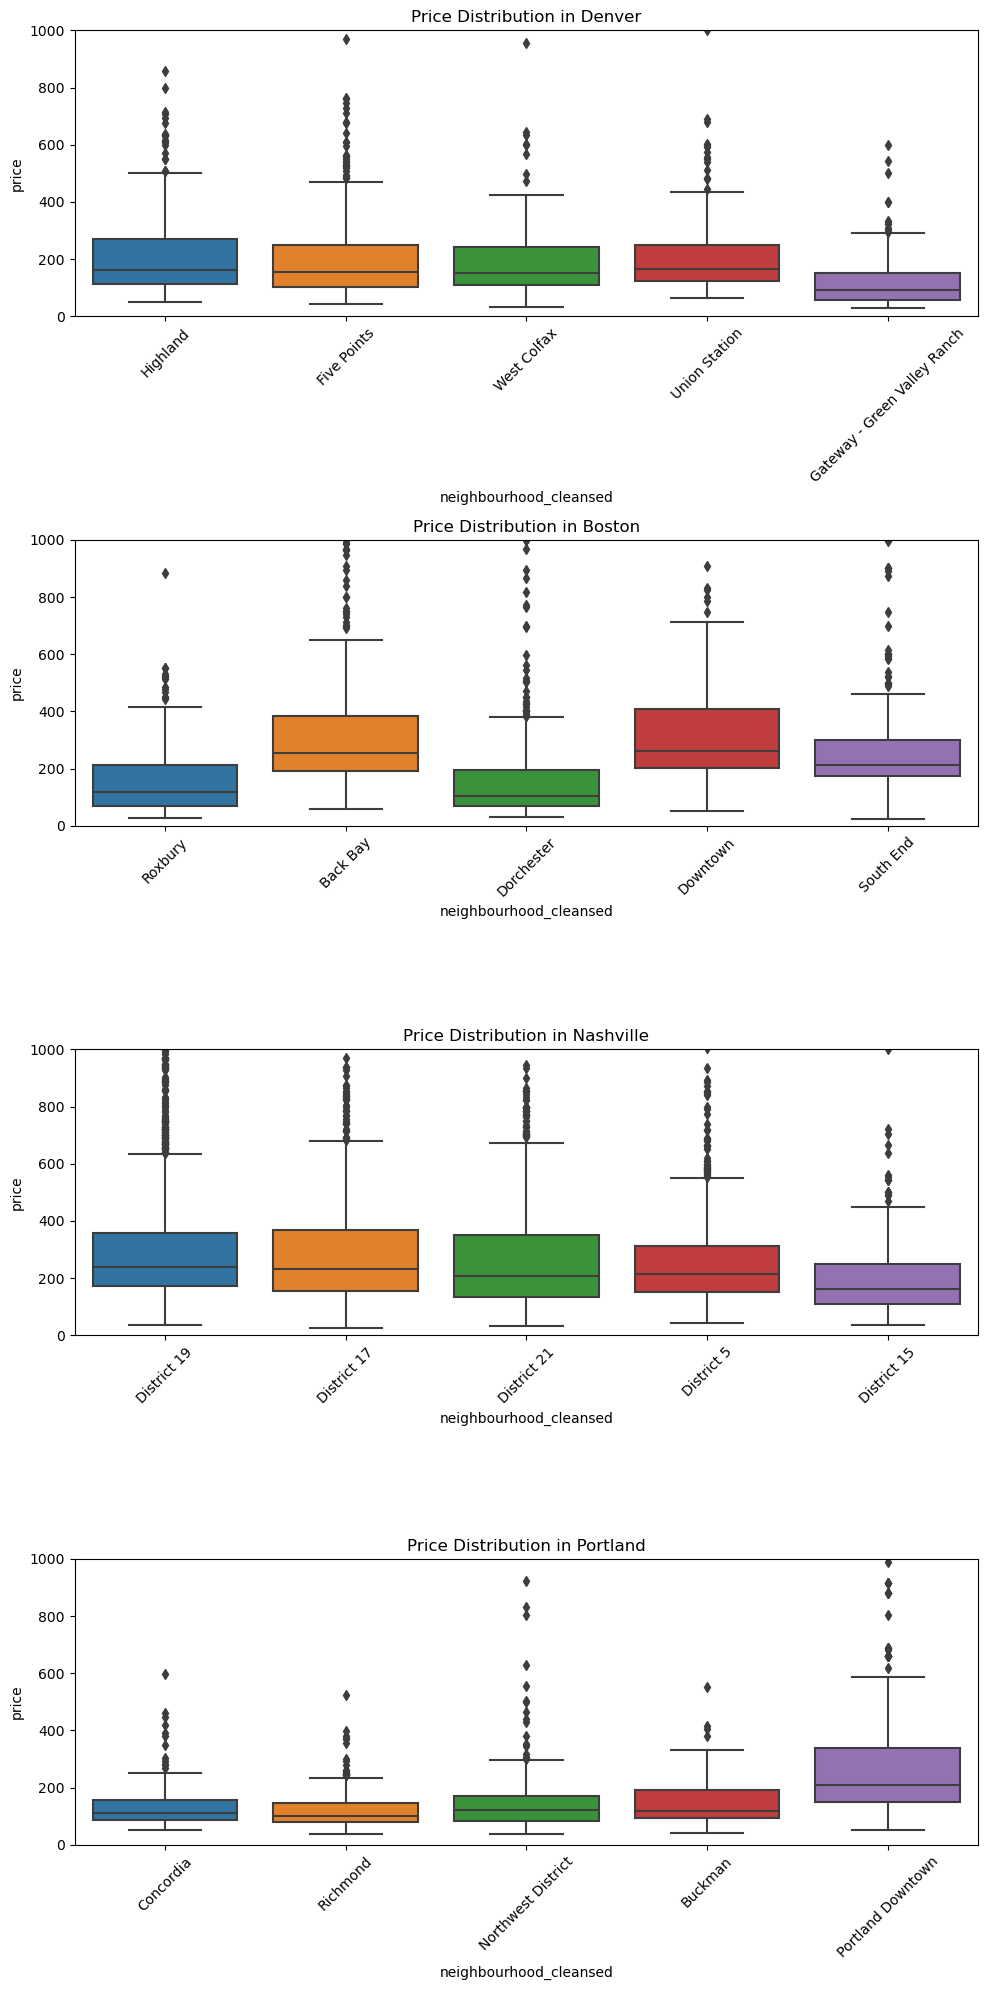

In [14]:

# Exploring other ways to view the neighbourhood data. While the below box plots are a little easier to read, it's too hard to see all of them in juxtaposition to each other. 
# Get the list of unique cities
cities = merged_neigh['city'].unique()

# Create a figure and a set of subplots
fig, axs = plt.subplots(nrows=len(cities), ncols=1, figsize=(10, 5 * len(cities)))

# Iterate over each city and create a box plot in each subplot
for i, city in enumerate(cities):
    # Filter the DataFrame for the current city
    city_data = merged_neigh[merged_neigh['city'] == city]

    # Create a box plot for the current city
    sns.boxplot(x='neighbourhood_cleansed', y='price', data=city_data, ax=axs[i])

    # Set the title for the subplot
    axs[i].set_title(f'Price Distribution in {city}')

    # Optional: Rotate the x-axis labels for better readability
    axs[i].tick_params(axis='x', rotation=45)
    
    #set ylim
    axs[i].set_ylim(0, 1000)


# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()
